## Principal Components Analysis
In this exercise, you will use principal component analysis (PCA) to perform
dimensionality reduction. You will first experiment with an example 2D
dataset to get intuition on how PCA works, and then use it on a bigger
dataset of 5000 faces.

In [1]:
import scipy.io
import numpy as np
import utils_pca
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## PCA on a simple 2D example
To help you understand how PCA works, you will first start with a 2D dataset
which has one direction of large variation and one of smaller variation. The
cell below will plot the training data (Figure 3 of your homework PDF). In this part of the
exercise, you will visualize what happens when you use PCA to reduce the
data from 2D to 1D. In practice, you might want to reduce data from 256 to
50 dimensions, say; but using lower dimensional data in this example allows
us to visualize the algorithms better.

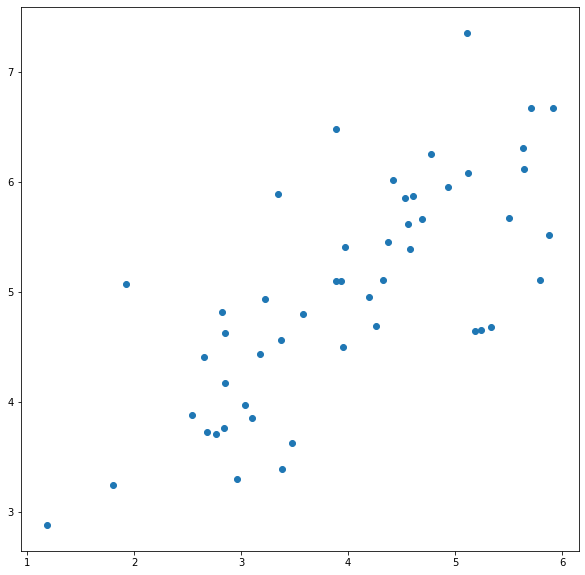

In [2]:
# Load the data
data = scipy.io.loadmat('pcadata1.mat')
X = data['X']
plt.scatter(X[:,0],X[:,1])

## Problem 5.1: Implementing PCA (5 points)}

In this part of the exercise, you will implement PCA. PCA consists of
two computational steps: First, you compute the covariance matrix of the
data. Then, you use **numpy's** SVD function to compute the eigenvectors
$U_1, U_2, \ldots , U_n$. These will correspond to the principal components of variation
in the data.

Before using PCA, it is important to first normalize the data by subtracting
the mean value of each feature from the dataset, and scaling each dimension
so that they are in the same range. The notebook {\tt pca.ipynb},
does this normalization for you using the {\tt feature\_normalize}
function.
After normalizing the data, you can run PCA to compute the principal
components. You task is to complete the function **pca** in **utils_pca.py** to compute the principal
components of the dataset. First, you should compute the covariance
matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X $$

where $X$ is the data matrix with examples in rows, and $m$ is the number of
examples. Note that $\Sigma$ is a $d \times d$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute
the principal components. In **numpy**, you can run SVD with the following
command: 

$$U,S,V = np.linalg.svd(Sigma,full\_matrices = False)$$

where **U** will contain the principal
components and **S** will contain a diagonal matrix.

Once you have completed the function, the cell below will run PCA on
the example dataset and plot the corresponding principal components found
(Figure 4 of your homework PDF). The cell will also output the top principal component (eigenvector)
found, and you should expect to see an output of about [-0.707
-0.707]. (It is possible that **numpy** may instead output the negative of this,
since $U_1$ and $-U_1$ are equally valid choices for the first principal component.)

In [3]:
import utils_pca

# You should now implement the function pca in utils_pca.py

# First, normalize X
Xnorm, mu, sigma = utils_pca.feature_normalize(X)
# Then run, PCA
U,S,V = utils_pca.pca(Xnorm)

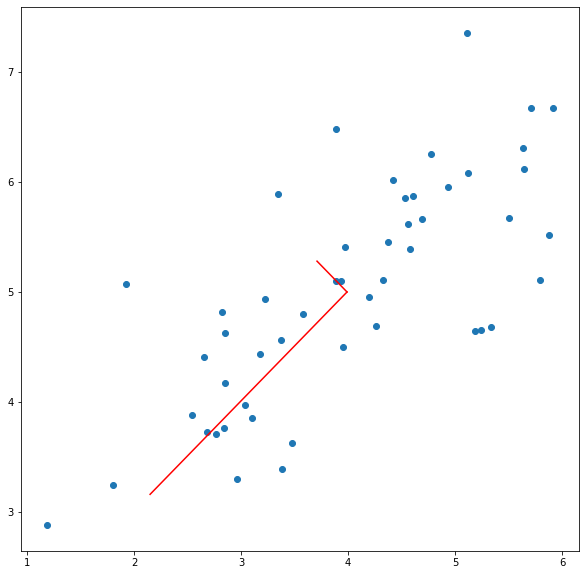

In [4]:
# visualize the eigenvectors
plt.figure()
plt.scatter(X[:,0],X[:,1])
eig1 = mu + 1.5*S[0]*U[0,:]
eig2 = mu + 1.5*S[1]*U[1,:]
plt.plot([mu[0],eig1[0]],[mu[1],eig1[1]],'r')
plt.plot([mu[0],eig2[0]],[mu[1],eig2[1]],'r')

## Dimensionality reduction with PCA

After computing the principal components, you can use them to reduce the
feature dimension of your dataset by projecting each example onto a lower
dimensional space, $x^{(i)} \rightarrow  z^{(i)}$ (e.g., projecting the data from 2D to 1D). In
this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space.
In practice, if you were using a learning algorithm such as linear regression
or perhaps neural networks, you could now use the projected data instead
of the original data. By using the projected data, you can train your model
faster as there are fewer dimensions in the input.

## Problem 5.2: Projecting the data onto the principal components (5 points)
You should now complete the function **project_data** in ** utils_pca.py**. Specifically, you are
given a dataset **X**, the principal components **U**, and the desired number of
dimensions to reduce to **K**. You should project each example in **X** onto the
top **K** components in **U**. Note that the top **K** components in **U** are given by
the first **K** columns of **U**.
Once you have completed the function **project_data** in **utils_pca.py**, the cell below will
project the first example onto the first dimension and you should see a value
of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$).

## Problem: 5.3 Reconstructing an approximation of the data (5 points)
After projecting the data onto the lower dimensional space, you can approximately
recover the data by projecting them back onto the original high
dimensional space. Your task is to complete the function **recover_data** in **utils_pca.py** to project each
example in **Z** back onto the original space and return the recovered approximation
in **X_rec**. Once you have completed the function **recover_data**, the cell below will
recover an approximation of the first example and you should see a value of
about [-1.047 -1.047].

In [6]:
# reconstruct the data X after projecting on the principal axis
K = 1
Z = utils_pca.project_data(Xnorm,U,K)
print ("The projection of the first example (should be about 1.496) ", Z[0])
X_rec = utils_pca.recover_data(Z,U,K)
print ("Approximation of the first example (should be about [-1.058 -1.058]) ",X_rec[0,:])

The projection of the first example (should be about 1.496)  [1.49631261]
Approximation of the first example (should be about [-1.058 -1.058])  [-1.05805279 -1.05805279]


## Visualizing the projections
After completing both **project_data** and **recover_data**, the cell below will
now perform both the projection and approximate reconstruction to show
how the projection affects the data. In Figure 5 of the homework handout, the original data points are
indicated with the blue circles, while the projected data points are indicated
with the red circles. The projection effectively only retains the information
in the direction given by $U_1$.

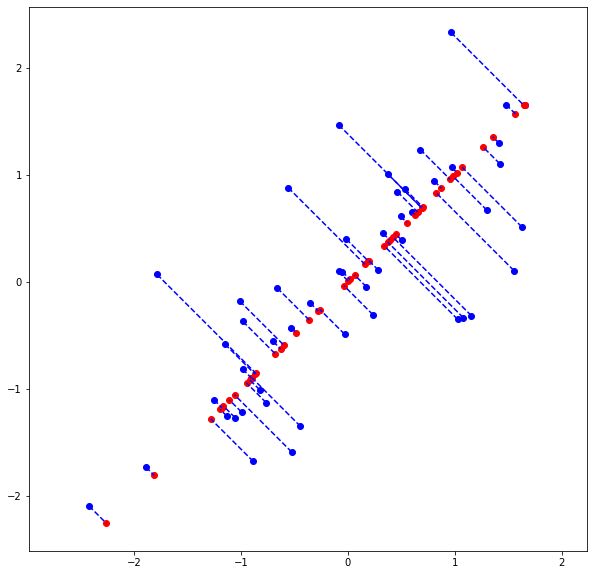

In [7]:
# Visualize the projected data
# plot the normalized data
plt.figure()
plt.scatter(Xnorm[:,0],Xnorm[:,1],c='b')
plt.ylim([-4,3])
plt.xlim([-4,3])
plt.axis('equal')
plt.scatter(X_rec[:,0],X_rec[:,1],c='r')

# draw lines connecting the projected points to the original points
for i in range(X_rec.shape[0]):
    plt.plot([Xnorm[i,0],X_rec[i,0]],[Xnorm[i,1],X_rec[i,1]],'b',linestyle='--')

## Face image dataset

In this part of the exercise, you will run PCA on face images to see how it
can be used in practice for dimension reduction. The dataset **pcafaces.mat**
contains a dataset **X** of face images, each $32 \times 32$ in grayscale. Each row
of **X**  corresponds to one face image (a row vector of length 1024). The next
cell will load and visualize the first 100 of these face images
(Figure 6 of homework PDF).

## PCA on faces
To run PCA on the face dataset, we first normalize the dataset by subtracting
the mean of each feature from the data matrix **X**. The cell below will
do this for you and then run your PCA function. After running PCA, you will
obtain the principal components of the dataset. Notice that each principal
component in U (each row) is a vector of length $d$ (where for the face dataset,
$d = 1024$). It turns out that we can visualize these principal components by
reshaping each of them into a $32\times 32$ matrix that corresponds to the pixels
in the original dataset. The cell below displays the first 25 principal
components that describe the largest variations (Figure 7 of homework PDF). If you want, you
can also change the code below  to display more principal components to see how
they capture more and more details.

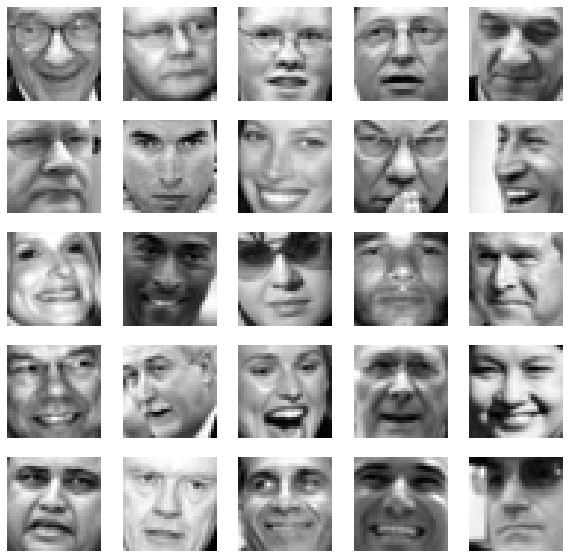

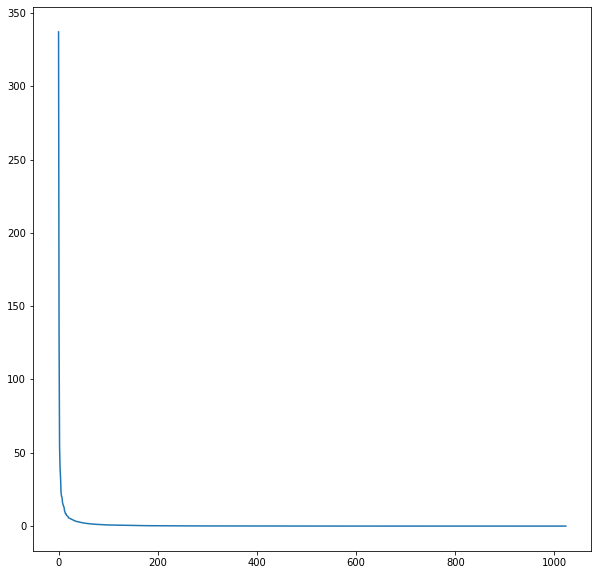

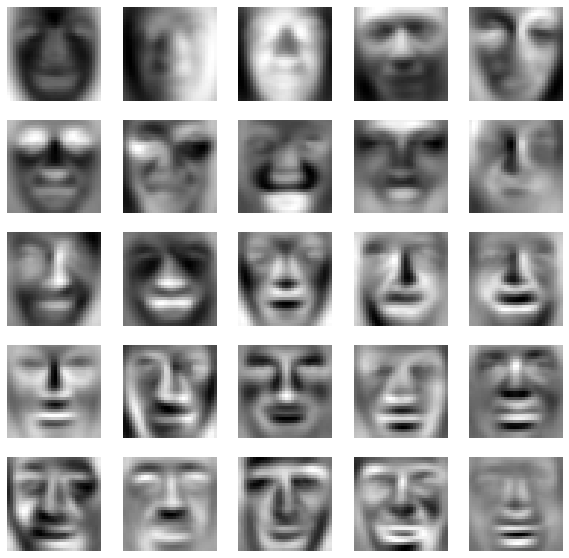

In [8]:
# PCA on the faces data set
faces_data = scipy.io.loadmat('pcafaces.mat')
faces = faces_data['X']

# visualize the first 25 faces
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(faces[i,:].reshape((32,32)).T)
    
# normalize the faces data set
faces_norm, mu_faces, sigma_faces = utils_pca.feature_normalize(faces)

# run PCA
U_faces, S_faces, V_faces = utils_pca.pca(faces_norm)

plt.figure()
plt.plot(S_faces)

plt.figure()
# top 25 eigenfaces
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(U_faces[:,i].reshape((32,32)).T)
    


## Dimensionality reduction
Now that you have computed the principal components for the face dataset,
you can use it to reduce the dimension of the face dataset. This allows you to
use your learning algorithm with a smaller input size (e.g., 100 dimensions)
instead of the original 1024 dimensions. This can help speed up your learning
algorithm.

The next cell will project the face dataset onto only the
first 100 principal components. Concretely, each face image is now described
by a vector $z^{(i)} \in \Re^{100}$. 
To understand what is lost in the dimension reduction, you can recover
the data using only the projected dataset. An approximate
recovery of the data is performed and the original and projected face images
are displayed side by side (Figure 8). From the reconstruction, you can observe
that the general structure and appearance of the face are kept while
the fine details are lost. This is a remarkable reduction (more than $10 \times$) in
the dataset size that can help speed up your learning algorithm significantly.
For example, if you were training a neural network to perform person recognition
(given a face image, predict the identitfy of the person), you can use
the dimension reduced input of only a 100 dimensions instead of the original
pixels.

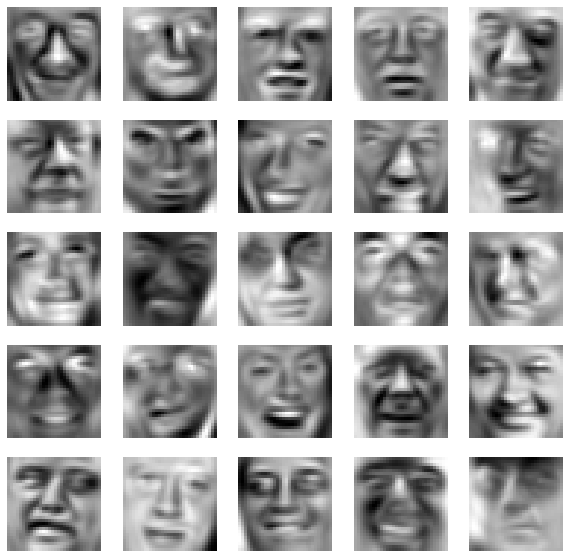

In [9]:
# show the recovered faces constructed out of top 100 principal components
K = 100
Z_faces = utils_pca.project_data(faces_norm,U_faces,K)
faces_rec = utils_pca.recover_data(Z_faces,U_faces,K)

plt.figure()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(faces_rec[i,:].reshape((32,32)).T)